## Hamiltonian theory

By Bill Chen

### Lagrangian dynamics

$$
L=K-V
$$

Lagrange's equation

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}}\right)-\frac{\partial L}{\partial q} = 0
$$

where $q$ is the coordinate. Any solution $q(t)$ is an extremal of the action

$$
I = \int_{t_0}^{t_1}Ldt
$$

**Note**: the coordinate $(q,\dot{q})$ can be multi-dimensional vectors. I'll be mostly only considering the 1D case, where they are scalars, to make my life easier. However, in higher-than-1D cases, the conclusions are almost the same, except for some notation difference. For example,

$$
\frac{\partial}{\partial q}\rightarrow\frac{\partial}{\partial {\bf q}}, \text{ sometimes also written as } \nabla_{\bf q}
$$

### Hamiltonian dynamic
$L$ is a function of $(q,\dot{q},t)$. If we want to use $(q,\partial L/\partial\dot{q},t)$ as the independent variables (for convenience, we call $\partial L/\partial\dot{q}$ as the momentum $p$), we can perform Legendre transformation $L\rightarrow H$:

$$
H=p\dot{q} - L
$$

We call the new quantity Hamiltonian. We have

$$
dH 
= pd\dot{q} + \dot{q}dp - dL 
= pd\dot{q} + \dot{q}dp - \frac{\partial L}{\partial q}dq - \frac{\partial L}{\partial\dot{q}}d\dot{q} - \frac{\partial L}{\partial t}dt
= \dot{q}dp - \frac{\partial L}{\partial q}dq - \frac{\partial L}{\partial t}dt
$$

Lagrange's equation tells us $\partial L/\partial q=\dot{p}$, so

$$
dH 
= \dot{q}dp - \dot{p}dq - \frac{\partial L}{\partial t}dt
$$

Therefore, $H$ is a function of $(q,p,t)$, as we want. Comparing the above with the total derivative of $H$

$$
dH = \frac{\partial H}{\partial q}dq + \frac{\partial H}{\partial p}dp + \frac{\partial H}{\partial t}dt
$$

we get Hamilton's equations

$$
\dot{q}=\frac{\partial H}{\partial p},\ \dot{p}=-\frac{\partial H}{\partial q}
$$

The orbit is given by the solutions $q(t)$ and $p(t)$. Along the orbit, the time derivative of $H$ is

$$
\frac{dH}{dt} = \dot{q}\frac{dp}{dt} - \dot{p}\frac{dq}{dt} - \frac{\partial L}{\partial t} = - \frac{\partial L}{\partial t}
$$

For many cases we are interested in, potential $V$ does not include time. Therefore ${\partial L}/{\partial t}=0$ and ${dH}/{dt}=0$. That is, $H$ is a constant along the orbit.

Actually, for a unit-mass particle in a potential using cartesian coordinate $q=x$, we have $K=\dot{x}^2/2$ and $L=\dot{x}^2/2-V$. Using $p=\partial L/\partial\dot{x}=\dot{x}$, we get $H=p\dot{x}-L=\dot{x}^2-L=\dot{x}^2/2+V=K+V$. The physical meaning of $H$ is the total energy.

**Example**: 2D Keplerian potential

$$
H = \frac{1}{2}(v_x^2 + v_y^2) - \frac{1}{\sqrt{x^2+y^2}}
$$

We have 

$$
\frac{d}{dt}(x,y,v_x,v_y) 
= \left(\frac{\partial H}{\partial v_x}, \frac{\partial H}{\partial v_y}, -\frac{\partial H}{\partial x}, -\frac{\partial H}{\partial y}\right) 
= \left(v_x, v_y, -\frac{x}{(x^2+y^2)^{3/2}}, -\frac{y}{(x^2+y^2)^{3/2}}\right)
$$

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


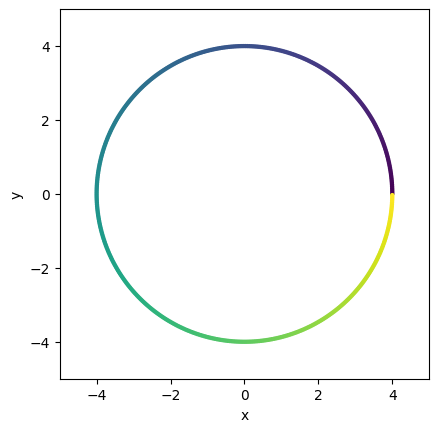

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def f(state, t):
    x, y, vx, vy = state
    dHdx, dHdy, dHdvx, dHdvy = x/(x**2+y**2)**1.5, y/(x**2+y**2)**1.5, vx, vy
    return np.array([dHdvx, dHdvy, -dHdx, -dHdy])

x0, y0, vx0, vy0 = 4.0, 0.0, 0.0, 0.5
state0 = np.array([x0, y0, vx0, vy0])

t_array = np.arange(0, 16*np.pi, 0.1)
solution = odeint(f, state0, t_array)

x, y, vx, vy = solution.T

fig, ax = plt.subplots()

ax.scatter(x, y, c=t_array, ec='None', s=10)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

### Poincare invariants

For any 2D surface $S$ in the phase space $({\bf q},{\bf p})$, we can define the Poincare invariant

$$
A = \iint_{S} d{\bf q}d{\bf p} = \sum_i\iint_{S} dq_idp_i
$$

If every points on $S$ evolve following the Hamilton's equation, we can verify $dA/dt = 0$ (I skip the proof, see BT08, Appendix D.4.2).

The physical meaning of the Poincare invariant is the total projected area of $S$ along all pairs of $(q,p)$. It is helpful to look at the loop integral along the boundary $\delta S$. Using Green's theorem, we have 

$$
\iint_{S} d{\bf q}d{\bf p} = \oint_{\delta S}{\bf p}\cdot d{\bf q} = -\oint_{\delta S}{\bf q}\cdot d{\bf p}
$$

which is also invariant.

### Poisson brackets

Hamilton's equations can be simplified into one equation for both coordinates and momenta if we use Poisson brackets:

$$
[A,B] = \frac{\partial A}{\partial q}\frac{\partial B}{\partial p} - \frac{\partial A}{\partial p}\frac{\partial B}{\partial q}
$$

Some basic features: $[A,A] = 0$, $[A,B] = -[B,A]$

Then, Hamilton's equations become

$$
\dot{w} = [w,H],\text{ for } w=q\text{ or }p
$$

**Note**: in higher-than-1D spaces $({\bf q}, {\bf p})$, Poisson's bracket is defined as

$$
[A,B] = \nabla_{\bf q}A\cdot\nabla_{\bf p}B - \nabla_{\bf p}A\cdot\nabla_{\bf q}B
$$

### Canonical transformation

If we perform coordinate transformation $(q,p)\rightarrow (Q,P)$, and the new coordinates also follow Hamilton's equations:

$$
\dot{Q}=\frac{\partial H}{\partial P}, \dot{P}=-\frac{\partial H}{\partial Q}
$$

We call this **canonical transformation**. We can verify that this happens if and only if $[Q,P]=1$. Here's the proof:

For the left-hand side of the first equation, we can rewrite it as

$$
\dot{Q} 
= \frac{\partial Q}{\partial q}\dot{q} + \frac{\partial Q}{\partial p}\dot{p}
= \frac{\partial Q}{\partial q}\frac{\partial H}{\partial p} - \frac{\partial Q}{\partial p}\frac{\partial H}{\partial q}
$$
$$
= \frac{\partial Q}{\partial q}\left(\frac{\partial H}{\partial Q}\frac{\partial Q}{\partial p}+\frac{\partial H}{\partial P}\frac{\partial P}{\partial p}\right) - \frac{\partial Q}{\partial p}\left(\frac{\partial H}{\partial Q}\frac{\partial Q}{\partial q}+\frac{\partial H}{\partial P}\frac{\partial P}{\partial q}\right)
$$
$$
= \frac{\partial Q}{\partial q}\frac{\partial H}{\partial P}\frac{\partial P}{\partial p} - \frac{\partial Q}{\partial p}\frac{\partial H}{\partial P}\frac{\partial P}{\partial q} 
= \left(\frac{\partial Q}{\partial q}\frac{\partial P}{\partial p} - \frac{\partial Q}{\partial p}\frac{\partial P}{\partial q}\right)\frac{\partial H}{\partial P}
= [Q,P]\frac{\partial H}{\partial P}
$$

Similarly, the right-hand side can be rewritten as

$$
\dot{P} = -[Q,P]\frac{\partial H}{\partial Q}
$$

Now, it is clear that we need $[Q,P]=1$ to obtain Hamilton's equations in the new coordinates.

**Note**: there are more requirements in higher-than-1D spaces. Specifically, we need $[Q_\alpha,P_\beta]=\delta_{\alpha\beta}$ and $[Q_\alpha,Q_\beta]=[P_\alpha,P_\beta]=0$. The latter is automatically correct in 1D space.

**Example**: 2D Keplerian potential using polar coordinates

$$
(r, \phi) = \left(\sqrt{x^2+y^2}, {\rm atan2}(y,x)\right)
$$

([Click here](https://en.wikipedia.org/wiki/Atan2) about $\rm atan2$) We can easily verify that $[r, \phi]=0$. Next, we need $[r,p_r]=[\phi,p_\phi]=1$. For the first bracket:

$$
[r,p_r] 
= \nabla_{\bf x}r\cdot\nabla_{\bf v}p_r - \nabla_{\bf v}r\cdot\nabla_{\bf x}p_r
$$
$$
= \frac{\partial r}{\partial x}\frac{\partial p_r}{\partial v_x} + \frac{\partial r}{\partial y}\frac{\partial p_r}{\partial v_y} - \frac{\partial r}{\partial v_x}\frac{\partial p_r}{\partial x} - \frac{\partial r}{\partial v_y}\frac{\partial p_r}{\partial y}
$$
$$
= \frac{x}{\sqrt{x^2+y^2}}\frac{\partial p_r}{\partial v_x} + \frac{y}{\sqrt{x^2+y^2}}\frac{\partial p_r}{\partial v_y}
= \cos\phi\frac{\partial p_r}{\partial v_x} + \sin\phi\frac{\partial p_r}{\partial v_y}
$$

To make sure $[r,p_r]=1$, we need $p_r=v_x\cos\phi + v_y\sin\phi=\dot{r}=v_r$.

Similarly

$$
[\phi,p_\phi] 
= \nabla_{\bf x}\phi\cdot\nabla_{\bf v}p_\phi - \nabla_{\bf v}\phi\cdot\nabla_{\bf x}p_\phi
$$
$$
= \frac{\partial \phi}{\partial x}\frac{\partial p_\phi}{\partial v_x} + \frac{\partial \phi}{\partial y}\frac{\partial p_\phi}{\partial v_y} - \frac{\partial \phi}{\partial v_x}\frac{\partial p_\phi}{\partial x} - \frac{\partial \phi}{\partial v_y}\frac{\partial p_\phi}{\partial y}
$$
$$
= -\frac{y}{x^2+y^2}\frac{\partial p_\phi}{\partial v_x} + \frac{x}{x^2+y^2}\frac{\partial p_\phi}{\partial v_y}
= -\frac{\sin\phi}{r}\frac{\partial p_\phi}{\partial v_x} + \frac{\cos\phi}{r}\frac{\partial p_\phi}{\partial v_y}
$$

To make sure $[\phi,p_\phi]=1$, we need $p_\phi=-rv_x\sin\phi + rv_y\cos\phi=r^2\dot{\phi}=rv_\phi$. **Note**: $p_\phi\neq\dot{\phi}\neq v_\phi$!

Again, we can easily verify that $[p_r, p_\phi]=0$. The Hamiltonian in new coordinates is

$$
H = \frac{1}{2}\left(p_r^2 + \frac{p_\phi^2}{r^2}\right) - \frac{1}{r}
$$

The Hamilton's equation becomes

$$
\frac{d}{dt}(r,\phi,p_r,p_\phi) 
= \left(\frac{\partial H}{\partial p_r}, \frac{\partial H}{\partial p_\phi}, -\frac{\partial H}{\partial r}, -\frac{\partial H}{\partial \phi}\right) 
= \left(p_r, \frac{p_\phi}{r^2}, \frac{p_\phi^2}{r^3}-\frac{1}{r^2}, 0\right)
$$

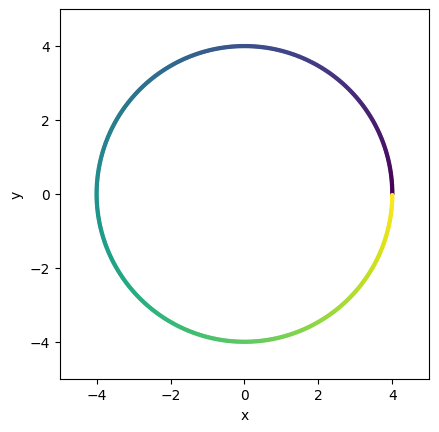

In [2]:
def fpolar(state, t):
    r, phi, pr, pphi = state
    dHdr, dHdphi, dHdpr, dHdpphi = -pphi**2/r**3+1/r**2, 0, pr, pphi/r**2
    return np.array([dHdpr, dHdpphi, -dHdr, -dHdphi])

r0, phi0, pr0, pphi0 = 4.0, 0.0, 0.0, 2.0
state0 = np.array([r0, phi0, pr0, pphi0])

solution = odeint(fpolar, state0, t_array)

r, phi, pr, pphi = solution.T

fig, ax = plt.subplots()

ax.scatter(r*np.cos(phi), r*np.sin(phi), c=t_array, ec='None', s=10)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

### Perturbation theory by Nibauer+24

Nibauer+24 considers the perturbation on potential $H = H_0 + H_1$, where 

$$
H_0 = K + V_0(q,t) \text{ and } H_1 = \epsilon V_1(q,t)
$$

We have $V_1\approx V_0$ and $\epsilon \ll 1$. Hamilton's equations are

$$
\dot{q} = \frac{\partial H_0}{\partial p}, \dot{p} = -\frac{\partial H_0}{\partial q} - \epsilon\frac{\partial V_1}{\partial q}
$$

Now, let's write the solutions as

$$
q = q_0 + \epsilon q_1 + O(\epsilon^2), p = p_0 + \epsilon p_1 + O(\epsilon^2)
$$

where $(q_0, p_0)$ are solutions to the base system $H_0$:

$$
\dot{q_0} = \frac{\partial H_0}{\partial p}, \dot{p_0} = -\frac{\partial H_0}{\partial q}
$$

Taking the derivatives of $(q,p)$ over $\epsilon$, we get

$$
\frac{dq}{d\epsilon} = q_1, \frac{dp}{d\epsilon} = p_1
$$

Now, take the time derivatives of both sides:

$$
\frac{d\dot{q}}{d\epsilon} = \frac{d}{d\epsilon}\left(\frac{\partial H_0}{\partial p}\right) = \dot{q}_1, 
\frac{d\dot{p}}{d\epsilon} = -\frac{d}{d\epsilon}\left(\frac{\partial H_0}{\partial q}\right) - \frac{d}{d\epsilon}\left(\epsilon\frac{\partial V_1}{\partial q}\right) = \dot{p}_1
$$

For the second equation, we have

$$
-\frac{d}{d\epsilon}\left(\frac{\partial H_0}{\partial q}\right) - \frac{d}{d\epsilon}\left(\epsilon\frac{\partial V_1}{\partial q}\right)
= -\frac{dq}{d\epsilon}\left(\frac{\partial^2 H_0}{\partial q^2}\right) - \frac{\partial V_1}{\partial q} - \epsilon\frac{d}{d\epsilon}\left(\frac{\partial V_1}{\partial q}\right)
= -q_1\left(\frac{\partial^2 H_0}{\partial q^2}\right) - \frac{\partial V_1}{\partial q} - \epsilon\frac{d}{d\epsilon}\left(\frac{\partial V_1}{\partial q}\right)
$$

So, we get the equations for $(q_1,p_1)$:

$$
\dot{q}_1 = \frac{d}{d\epsilon}\left(\frac{\partial H_0}{\partial p}\right), 
= -q_1\left(\frac{\partial^2 H_0}{\partial q^2}\right) - \frac{\partial V_1}{\partial q} - \epsilon\frac{d}{d\epsilon}\left(\frac{\partial V_1}{\partial q}\right)
$$

For cartesian coordinates $H=|{\bf v}|^2/2 + V_0({\bf x}, t) + \epsilon V_1({\bf x}, t)$, we can further simplify the equations:

$$
\dot{\bf x}_1 = \frac{d{\bf v}}{d\epsilon} = {\bf v}_1, 
\dot{\bf v}_1 = -{\bf x}_1\cdot\left(\nabla_{\bf x}\nabla_{\bf x} V_0\right) - \nabla_{\bf x}V_1 - \epsilon\frac{d}{d\epsilon}\left(\nabla_{\bf x}V_1\right)
$$

To get $(q_1, p_1)$ along the unperturbed orbit (i.e., $\epsilon=0$), the last term becomes zero:

$$
\dot{\bf x}_1 = {\bf v}_1, 
\dot{\bf v}_1 = -{\bf x}_1\cdot{\bf T}_0 - \nabla_{\bf x}V_1
$$

where ${\bf T}_0=\nabla_{\bf x}\nabla_{\bf x} V_0$ is the tidal tensor. We finally get Eq. (14) in Nibauer+24.

**Example**: 2D Keplerian potential, and the perturbation is also Keplerian: 

$$
V_1 = -\frac{1}{\sqrt{(x-\Delta x)^2+(y-\Delta y)^2}}
$$

So, the total Hamiltonian is 

$$
H = \frac{1}{2}(v_x^2 + v_y^2) - \frac{1}{\sqrt{x^2+y^2}} -\frac{1}{\sqrt{(x-\Delta x)^2+(y-\Delta y)^2}}
$$

In [3]:
# Calculate tidal tensor using sympy

import sympy as sp

xsym, ysym = sp.symbols('x y')

Vsym = -1 / sp.sqrt(xsym**2 + ysym**2)

Tsym = sp.hessian(Vsym, (xsym, ysym))

Tsym = sp.simplify(Tsym)
f_T = sp.lambdify((xsym, ysym), Tsym, modules='numpy')

Tsym

Matrix([
[(-2*x**2 + y**2)/(x**2 + y**2)**(5/2),          -3*x*y/(x**2 + y**2)**(5/2)],
[          -3*x*y/(x**2 + y**2)**(5/2), (x**2 - 2*y**2)/(x**2 + y**2)**(5/2)]])

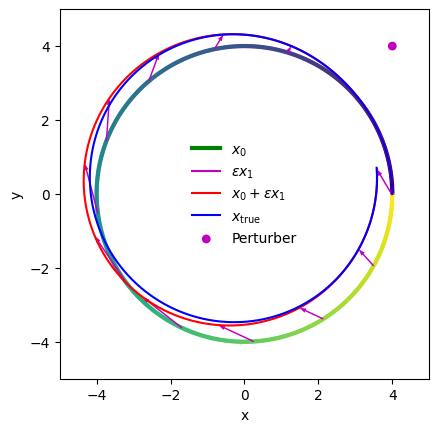

In [4]:
# Base solution

xt = interp1d(t_array, x, fill_value='extrapolate')
yt = interp1d(t_array, y, fill_value='extrapolate')
vxt = interp1d(t_array, vx, fill_value='extrapolate')
vyt = interp1d(t_array, vy, fill_value='extrapolate')

fig, ax = plt.subplots()

ax.scatter(x, y, c=t_array, ec='None', s=10)
ax.plot([], [], c='g', lw=3, label='$x_0$')

# Perturbation

dx, dy = 4, 4
epsilon = 0.02

def f1(state, t):
    x1, y1, vx1, vy1 = state
    x, y, vx, vy = xt(t), yt(t), vxt(t), vyt(t)
    
    dV1dx, dV1dy = (x-dx)/((x-dx)**2+(y-dy)**2)**1.5, (y-dy)/((x-dx)**2+(y-dy)**2)**1.5
    T_term = f_T(x, y) @ np.array([x1, y1]) # tidal term
    
    dx1dt, dy1dt, dvx1dt, dvy1dt = vx1, vy1, -T_term[0]-dV1dx, -T_term[1]-dV1dy
    return np.array([dx1dt, dy1dt, dvx1dt, dvy1dt])
    
state0 = np.array([0.0, 0.0, 0.0, 0.0])
solution = odeint(f1, state0, t_array)

x1, y1, vx1, vy1 = solution.T

for i in range(len(t_array)-1, 100, -40):
    ax.arrow(x[i],y[i],epsilon*x1[i],epsilon*y1[i], width=0.04, fc='m', ec='None', length_includes_head=True)
ax.plot([], [], c='m', label='$\epsilon x_1$')

ax.plot(x+epsilon*x1, y+epsilon*y1, c='r', label='$x_0+\epsilon x_1$')

# true solution

def ftrue(state, t):
    x, y, vx, vy = state
    dH1dx, dH1dy, dH1dvx, dH1dvy = (x-dx)/((x-dx)**2+(y-dy)**2)**1.5, (y-dy)/((x-dx)**2+(y-dy)**2)**1.5, 0, 0
    return f(state, t) + epsilon*np.array([dH1dvx, dH1dvy, -dH1dx, -dH1dy])

x0, y0, vx0, vy0 = 4.0, 0.0, 0.0, 0.5
state0 = np.array([x0, y0, vx0, vy0])

solution = odeint(ftrue, state0, t_array)

xtrue, ytrue, vxtrue, vytrue = solution.T
ax.plot(xtrue, ytrue, c='b', label=r'$x_{\rm true}$')

ax.scatter(dx, dy, s=40, fc='m', ec='None', label='Perturber')

ax.legend(frameon=False, loc='center')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

### More examples

**Many perturbers**

Linear theory is powerful because you can directly add the corrections due to different sources of perturbation. Consider two perturbers $V_1 = V_{1,1} + V_{1,2}$:

$$
V_{1,1} = -\frac{1}{\sqrt{(x-\Delta x_1)^2+(y-\Delta y_1)^2}}
$$
$$
V_{1,2} = -\frac{1}{\sqrt{(x-\Delta x_2)^2+(y-\Delta y_2)^2}}
$$

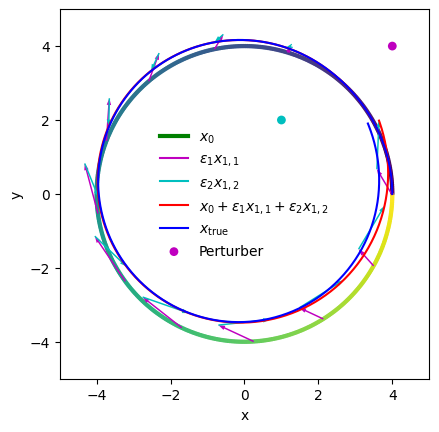

In [5]:
# Base solution

fig, ax = plt.subplots()

ax.scatter(x, y, c=t_array, ec='None', s=10)
ax.plot([], [], c='g', lw=3, label='$x_0$')

# Perturbation 1

dx1, dy1 = 4, 4
epsilon1 = 0.02

def f1(state, t):
    x1, y1, vx1, vy1 = state
    x, y, vx, vy = xt(t), yt(t), vxt(t), vyt(t)
    
    dV1dx, dV1dy = (x-dx1)/((x-dx1)**2+(y-dy1)**2)**1.5, (y-dy1)/((x-dx1)**2+(y-dy1)**2)**1.5
    T_term = f_T(x, y) @ np.array([x1, y1]) # tidal term
    
    dx1dt, dy1dt, dvx1dt, dvy1dt = vx1, vy1, -T_term[0]-dV1dx, -T_term[1]-dV1dy
    return np.array([dx1dt, dy1dt, dvx1dt, dvy1dt])
    
state0 = np.array([0.0, 0.0, 0.0, 0.0])
solution = odeint(f1, state0, t_array)

x11, y11, vx11, vy11 = solution.T

for i in range(len(t_array)-1, 100, -40):
    ax.arrow(x[i],y[i],epsilon1*x11[i],epsilon1*y11[i], width=0.04, fc='m', ec='None', length_includes_head=True)
ax.plot([], [], c='m', label='$\epsilon_1 x_{1,1}$')

# Perturbation 2

dx2, dy2 = 1, 2
epsilon2 = 0.02

def f1(state, t):
    x1, y1, vx1, vy1 = state
    x, y, vx, vy = xt(t), yt(t), vxt(t), vyt(t)
    
    dV1dx, dV1dy = (x-dx2)/((x-dx2)**2+(y-dy2)**2)**1.5, (y-dy2)/((x-dx2)**2+(y-dy2)**2)**1.5
    T_term = f_T(x, y) @ np.array([x1, y1]) # tidal term
    
    dx1dt, dy1dt, dvx1dt, dvy1dt = vx1, vy1, -T_term[0]-dV1dx, -T_term[1]-dV1dy
    return np.array([dx1dt, dy1dt, dvx1dt, dvy1dt])
    
state0 = np.array([0.0, 0.0, 0.0, 0.0])
solution = odeint(f1, state0, t_array)

x12, y12, vx12, vy12 = solution.T

for i in range(len(t_array)-1, 100, -40):
    ax.arrow(x[i]+epsilon1*x11[i],y[i]+epsilon1*y11[i],epsilon2*x12[i],epsilon2*y12[i], width=0.04, fc='c', ec='None', length_includes_head=True)
ax.plot([], [], c='c', label='$\epsilon_2 x_{1,2}$')

ax.plot(x+epsilon1*x11+epsilon2*x12, y+epsilon1*y11+epsilon2*y12, c='r', label='$x_0+\epsilon_1 x_{1,1}+\epsilon_2 x_{1,2}$')

# true solution

def ftrue(state, t):
    x, y, vx, vy = state
    dH11dx, dH11dy, dH11dvx, dH11dvy = (x-dx1)/((x-dx1)**2+(y-dy1)**2)**1.5, (y-dy1)/((x-dx1)**2+(y-dy1)**2)**1.5, 0, 0
    dH12dx, dH12dy, dH12dvx, dH12dvy = (x-dx2)/((x-dx2)**2+(y-dy2)**2)**1.5, (y-dy2)/((x-dx2)**2+(y-dy2)**2)**1.5, 0, 0
    return f(state, t) + epsilon1*np.array([dH11dvx, dH11dvy, -dH11dx, -dH11dy]) + epsilon2*np.array([dH12dvx, dH12dvy, -dH12dx, -dH12dy])

x0, y0, vx0, vy0 = 4.0, 0.0, 0.0, 0.5
state0 = np.array([x0, y0, vx0, vy0])

solution = odeint(ftrue, state0, t_array)

xtrue, ytrue, vxtrue, vytrue = solution.T
ax.plot(xtrue, ytrue, c='b', label=r'$x_{\rm true}$')

ax.scatter(dx1, dy1, s=40, fc='m', ec='None', label='Perturber')
ax.scatter(dx2, dy2, s=40, fc='c', ec='None')

ax.legend(frameon=False, loc='center')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

**Harmonic oscillator**

$$
H = \frac{v^2}{2} + \frac{x^2}{2}
$$

Consider perturbation an additional spring

$$
V_1 = \frac{(x-\Delta x)^2}{2}
$$

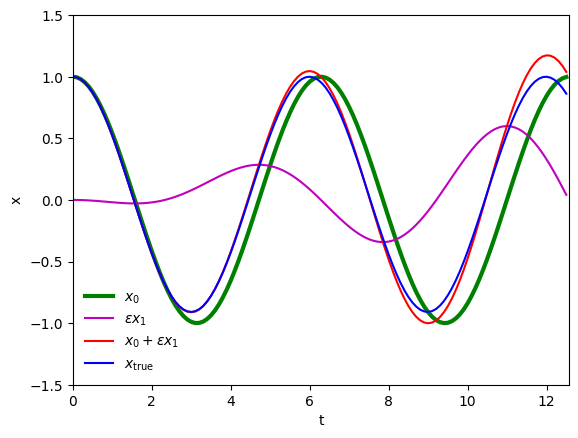

In [6]:
# Base solution

fig, ax = plt.subplots()

def f(state, t):
    x, v = state
    dHdx, dHdv = x, v
    return np.array([dHdv, -dHdx])

x0, v0 = 1.0, 0.0
state0 = np.array([x0, v0])

t_array = np.arange(0, 4*np.pi, 0.1)
solution = odeint(f, state0, t_array)

x, v = solution.T

ax.plot(t_array, x, c='g', lw=3, label='$x_0$')

xt = interp1d(t_array, x, fill_value='extrapolate')
vt = interp1d(t_array, v, fill_value='extrapolate')

# Perturbation

epsilon = 0.1
dx = 0.5

def f1(state, t):
    x1, v1 = state
    x, v = xt(t), vt(t)
    
    dV1dx = x - dx
    T_term = 1 * x1 # tidal term
    
    dx1dt, dv1dt = v1, -T_term-dV1dx
    return np.array([dx1dt, dv1dt])
    
state0 = np.array([0.0, 0.0])
solution = odeint(f1, state0, t_array)

x1, v1 = solution.T

ax.plot(t_array, epsilon*x1, c='m', label='$\epsilon x_1$')
ax.plot(t_array, x+epsilon*x1, c='r', label='$x_0+\epsilon x_1$')

# true solution

def ftrue(state, t):
    x, v = state
    dH1dx, dH1dv = x - dx, 0
    return f(state, t) + epsilon*np.array([dH1dv, -dH1dx])

x0, v0 = 1.0, 0.0
state0 = np.array([x0, v0])
solution = odeint(ftrue, state0, t_array)

xtrue, vtrue = solution.T

ax.plot(t_array, xtrue, c='b', label=r'$x_{\rm true}$')

ax.legend(frameon=False, loc='lower left')

ax.set_xlim(0,4*np.pi)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()